# Sentiment Analysis of Movie Reviews using Machine Learning Models with binary classification

This project aims to perform sentiment analysis on a dataset of movie reviews. The goal is to classify each review as positive or negative. We will use several machine learning models, including Logistic Regression (LR), Support Vector Machine (SVM), and Naive Bayes (NB), to build classification models. The dataset consists of movie reviews labeled with binary sentiment (positive = 1, negative = 0).
![](image.png)
We will process the dataset, vectorize the text data, train the models, evaluate their performance, and finally deploy them for future predictions.


# Importing the necessary libraries for data analysis and machine learning

In this section, we import the required libraries for data processing, feature extraction, model training, and evaluation. We will use `pandas` for data manipulation, `scikit-learn` for machine learning models, and `matplotlib` for visualization.


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Loading the Dataset

Here we load the dataset of movie reviews. The dataset contains two columns: `Text` (the review) and `Sentiment` (the sentiment label, where 0 represents a negative review and 1 represents a positive review). We will inspect the data to check for any issues such as missing values or duplicates.


In [5]:
# Load the dataset
df = pd.read_csv('reviews.csv', encoding="ISO-8859-1")
df.head(10)

,Text,Sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0
5,"A funny thing happened to me while watching ""M...",0
6,This German horror film has to be one of the w...,0
7,"Being a long-time fan of Japanese film, I expe...",0
8,"""Tokyo Eyes"" tells of a 17 year old Japanese g...",0
9,Wealthy horse ranchers in Buenos Aires have a ...,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       50000 non-null  object
 1   Sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [7]:
df.groupby('Sentiment').describe()

Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          25000  24697  When i got this movie free from my job, along ...   
1          25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
Sentiment       
0            3  
1            5

# Data Preprocessing

Before training the models, we need to preprocess the data. This includes removing duplicate reviews and ensuring that there are no missing values. We will also check the class distribution (positive vs. negative reviews) and clean the text data for feature extraction.


In [9]:
df = df.drop_duplicates()
df.groupby('Sentiment').describe()

Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          24697  24697  Once again Mr. Costner has dragged out a movie...   
1          24884  24884  I went and saw this movie last night after bei...   

                
          freq  
Sentiment       
0            1  
1            1

# Text Vectorization with CountVectorizer

Machine learning models cannot directly work with raw text. Therefore, we need to convert the text data into numerical features. We will use `CountVectorizer` to convert the reviews into word frequency vectors. Additionally, we will remove stopwords and apply the `min_df=20` parameter to ignore words that appear less than 20 times in the corpus.


In [11]:
# Prepare text data
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']


# Splitting the Data into Training and Test Sets

We will now split the dataset into training and testing sets. We will use 80% of the data for training and 20% for testing. This split allows us to train the models on one subset and evaluate their performance on another.


In [13]:
# Split data into training and testing sets (80/20 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Model Training

We will train three different models: Logistic Regression (LR), Support Vector Machine (SVM), and Naive Bayes (NB). Each model will be trained using the training data (`X_train` and `y_train`) and evaluated later based on their performance.


# Model Evaluation

We will evaluate the performance of the trained models using several metrics:
- **Accuracy**: The overall correctness of the model.
- **Precision**: The percentage of true positive predictions among all positive predictions.
- **Recall**: The percentage of true positive predictions among all actual positives.
- **F1-Score**: The harmonic mean of precision and recall.
- **AUC-ROC**: The Area Under the Receiver Operating Characteristic Curve.

These metrics will help us understand how well each model performs.


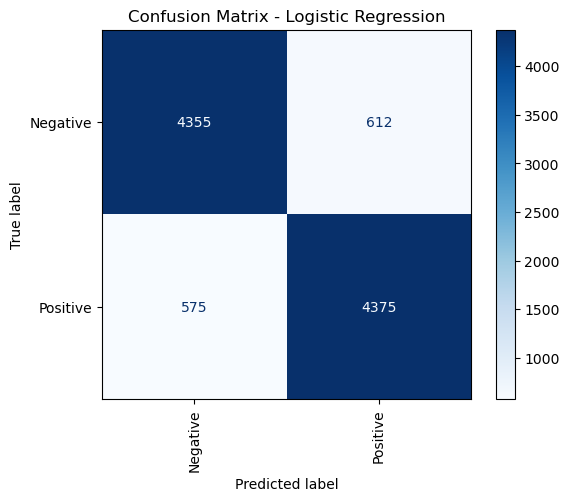


Model: Logistic Regression
Accuracy: 0.8803065443178381
Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.88      0.88      4967
    Positive       0.88      0.88      0.88      4950

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



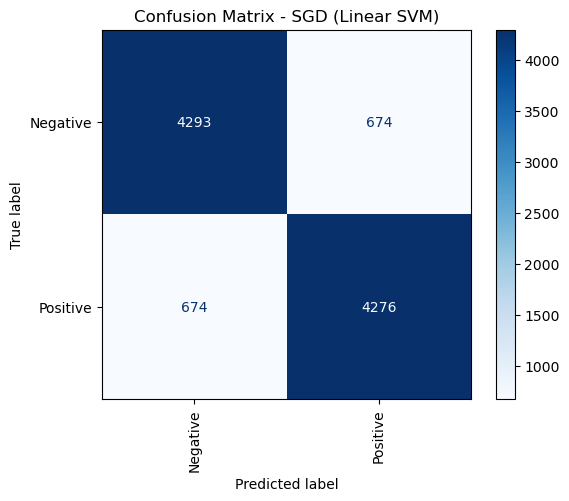


Model: SGD (Linear SVM)
Accuracy: 0.86407179590602
Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.86      0.86      4967
    Positive       0.86      0.86      0.86      4950

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



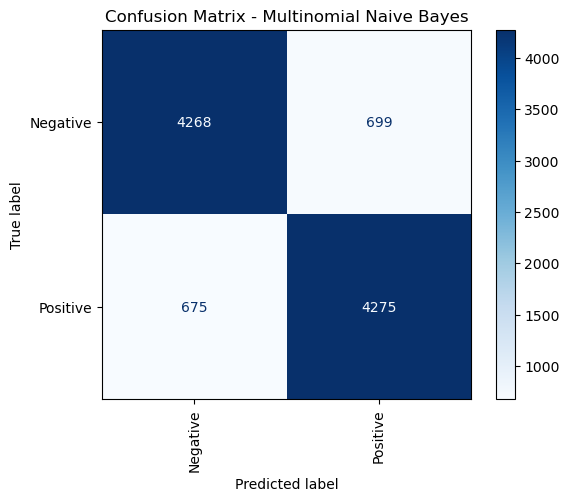


Model: Multinomial Naive Bayes
Accuracy: 0.8614500352929313
Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.86      0.86      4967
    Positive       0.86      0.86      0.86      4950

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



In [16]:

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=0),
    "SGD (Linear SVM)": LinearSVC(random_state=0),
    "Multinomial Naive Bayes": MultinomialNB()
}

# Train and evaluate models
results = {}

for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report (precision, recall, f1-score)
    class_report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
    
    # Plot confusion matrix using ConfusionMatrixDisplay
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
    disp.plot(cmap='Blues', xticks_rotation='vertical')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Classification Report': class_report
    }
    
    # Print results for each model
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{class_report}")

In [18]:
# Example scoring a new review
review = 'The long lines and poor customer service really turned me off.'
vectorized_review = vectorizer.transform([review])
print(f"Sentiment score (Negative/Positive): {models['Logistic Regression'].predict_proba(vectorized_review)[0][1]:.4f}")



Sentiment score (Negative/Positive): 0.1533


In [19]:
review = 'One of the more delightful experiences I have had!'
vectorized_review = vectorizer.transform([review])
print(f"Sentiment score (Negative/Positive): {models['Logistic Regression'].predict_proba(vectorized_review)[0][1]:.4f}")



Sentiment score (Negative/Positive): 0.7629


In [6]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
# Load the dataset
df = pd.read_csv('reviews.csv', encoding="ISO-8859-1")
# Define maximum number of words to use and maximum sequence length
max_words = 10000  # Vocabulary size
max_len = 100      # Maximum length of a sequence
# Tokenizing the text data
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['Sentiment'], test_size=0.2, random_state=42)
# Build the Model
model = Sequential([
   Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
   LSTM(64, return_sequences=True),
   Dropout(0.3),
   LSTM(32),
   Dense(32, activation='relu'),
   Dropout(0.3),
   Dense(1, activation='sigmoid')  # Output layer for binary classification
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the Model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=32, verbose=1)
# Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)


Epoch 1/5


C:\Users\win\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 55s 51ms/step - accuracy: 0.6857 - loss: 0.5785 - val_accuracy: 0.7713 - val_loss: 0.4574
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 50s 50ms/step - accuracy: 0.7399 - loss: 0.5098 - val_accuracy: 0.8171 - val_loss: 0.4230
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 52s 52ms/step - accuracy: 0.8608 - loss: 0.3550 - val_accuracy: 0.8315 - val_loss: 0.3845
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 53s 52ms/step - accuracy: 0.8951 - loss: 0.2733 - val_accuracy: 0.8374 - val_loss: 0.3912
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 52s 52ms/step - accuracy: 0.9254 - loss: 0.2087 - val_accuracy: 0.8361 - val_loss: 0.4051


# Saving the Models for Future Predictions

Once the models have been trained and evaluated, we will save them for future use. This allows us to load the models later and make predictions without retraining. We'll save both the models and the `CountVectorizer` vocabulary.


In [21]:
import pickle

pickle.dump(model, open('sentiment.pkl', 'wb'))
pickle.dump(vectorizer.vocabulary_, open('vocabulary.pkl', 'wb'))

# Conclusion

In this project, we successfully built and evaluated three sentiment analysis models: Logistic Regression, Support Vector Machine, and Naive Bayes. Each model was evaluated based on various metrics such as accuracy, precision, recall, F1-score, and AUC-ROC. We also saved the models and the vectorizer for future predictions. 

In practice, these models can be used to predict the sentiment of new movie reviews. The saved models can be loaded for quick predictions without the need for retraining.
